## **NLP Final Year Project**

Project Name - Amazon Cell Phone Reviews

Dataset link - https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews?resource=download



Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
import string

from textblob import TextBlob
from datetime import datetime
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Datasets

In [18]:
items = pd.read_csv("items.csv")
reviews = pd.read_csv('reviews.csv')

In [19]:
#Items Data Information
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))
items.head()

The dataset contains  720 rows and  10 variables.


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [20]:
items.describe(include="all")

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720,720,720.000000,720,720.000000,720.000000,720.000000
unique,720,10,718,720,679,NaN,720,NaN,NaN,NaN
top,B07YZS6QT3,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,https://www.amazon.com/Samsung-A30S-Screen-Fin...,https://m.media-amazon.com/images/I/817r8IrEN5...,NaN,https://www.amazon.com/product-reviews/B07YZS6QT3,NaN,NaN,NaN
freq,1,346,2,1,3,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.713750,NaN,105.679167,234.948931,63.690778
std,NaN,NaN,NaN,NaN,NaN,0.716014,NaN,167.601101,200.008441,172.405370
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,7.000000,97.512500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,32.000000,188.975000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,122.250000,336.725000,0.000000


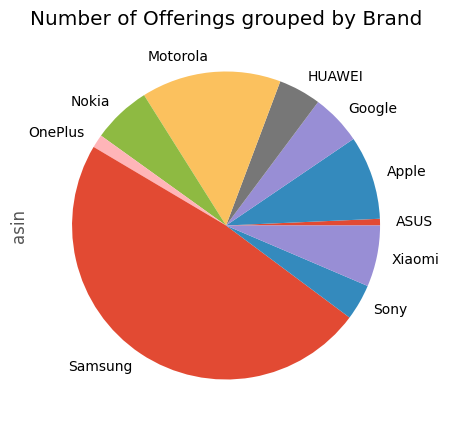

In [21]:
plt.style.use("ggplot")
# Brand distribution
ax = items.groupby("brand").count()["asin"].plot(kind="pie", figsize=(8, 5), title="Number of Offerings grouped by Brand")
plt.show()

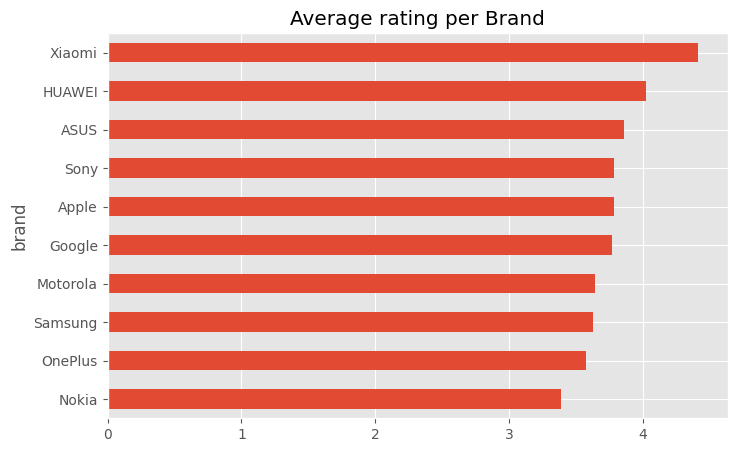

In [22]:
# Convert 'rating' column to numeric
items['rating'] = pd.to_numeric(items['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' column, if any
items.dropna(subset=['rating'], inplace=True)

# Group by 'brand' and calculate mean of 'rating'
mean_ratings = items.groupby("brand")["rating"].mean()

# Sort values and plot
mean_ratings.sort_values().plot(kind="barh", figsize=(8,5), title="Average rating per Brand")
plt.show()


In [23]:
# Reviews Data Information
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(reviews.shape))
reviews.head()

The dataset contains  67,986 rows and  8 variables.


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


Merge the Two Datasets

In [24]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [25]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


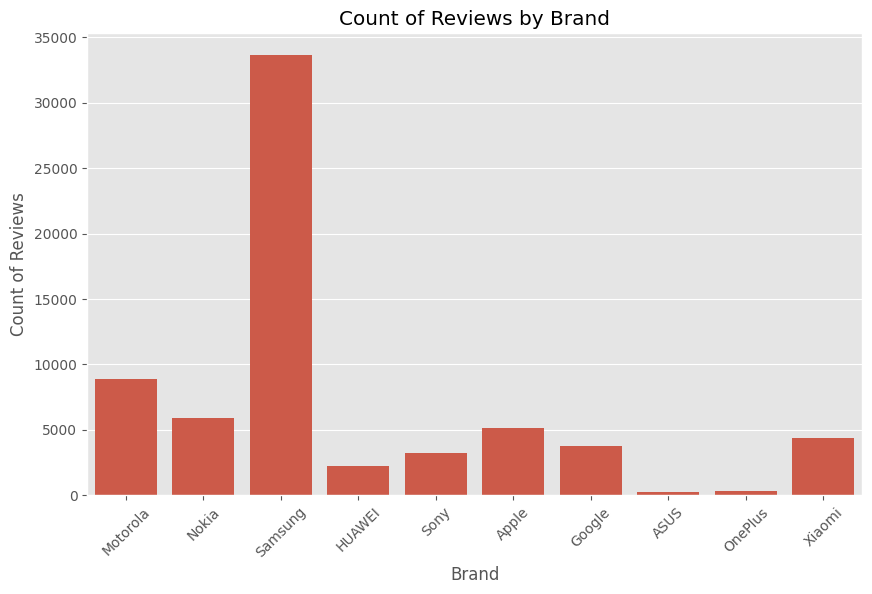

In [26]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='brand')
plt.title('Count of Reviews by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Convert string into datetime
reviews["date"] = reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [28]:
# Truncate date column to month
reviews["month"] = reviews["date"].apply(lambda x: x.replace(day=1))
reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

In [29]:
# Add posivity label
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

## Text Cleaning <br>
This section creates functions to clean text, which includes:

Convert the text into lowercase
Remove punctuation
Remove stopwords (English, from nltk corpus)
Remove other keywords like "phone" and brand name

In [30]:
# Initialize WordNetLemmatizer and set of stopwords
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punc = set(string.punctuation)

# Define keywords list
keywords = set(reviews["brand"].str.lower().unique().tolist())
keywords.add("phone")

def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join(char for char in text if char not in punc)
    # Split into list of words
    word_list = text.split()
    # Remove stopwords and keywords
    word_list = [word for word in word_list if word not in stop and word not in keywords]
    # Lemmatization
    word_list = [lemma.lemmatize(word) for word in word_list]
    return " ".join(word_list)

In [31]:
# Apply preprocess function to the dataframe
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)

Let's have a look at first 5 cleaned reviews:

In [32]:
reviews["clean_text"].head().values

array(['a600 awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale 1 wonder sold cheap bad hate menu take forever get want scroll endlessly usually phone numbered category u simply press get want go pain put silent vibrate youre class ring turn immediately there fast way silence damn thing always remember put silent learned hard way true case mission get break ur nail process also youll damage case time u try reason started giving problem succeed opening button could bit bigger vibration could stronger good reception shabby using elevator remarkable feat considering old would lose service simply putting pocket compared old work quite well ring tone loud enough hear actually charge quickly great battery life doesnt heat like potatoe oven either long convos nice bright large screen cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great',
       'du

### Word Cloud

Given the size of the dataset, we created wordclouds only for the latest 1000 positive and negative reviews for Apple, Samsung and Xiaomi separately. The wordclouds are based on the frequency of words.

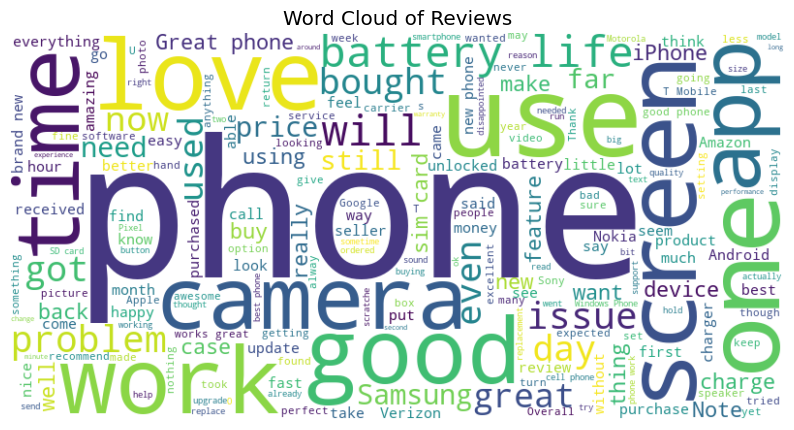

In [33]:
# Combine all the reviews into a single string, handling missing values
all_reviews = ' '.join(reviews['body'].dropna().astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

In [34]:
# Sentiment Analysis
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        return 'Neutral'  # or any other handling strategy for missing values

reviews['sentiment'] = reviews['body'].apply(analyze_sentiment)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(reviews['body'], reviews['sentiment'], test_size=0.2, random_state=42)

In [36]:
# Replace NaN values with an empty string
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Linear SVC Model

In [37]:
# Train Linear SVC model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_model.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nLinear SVC Model Results:")
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)


Linear SVC Model Results:
Accuracy Score: 0.940358876305339
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.73      0.79      1709
     Neutral       0.93      0.95      0.94      1984
    Positive       0.95      0.97      0.96      9905

    accuracy                           0.94     13598
   macro avg       0.91      0.88      0.90     13598
weighted avg       0.94      0.94      0.94     13598

Confusion Matrix:
[[1243   58  408]
 [  39 1889   56]
 [ 172   78 9655]]


Logistic Regression Model

In [38]:
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nLogistic Regression Model Results:")
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)


Logistic Regression Model Results:
Accuracy Score: 0.9303574055008089
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.67      0.75      1709
     Neutral       0.90      0.93      0.92      1984
    Positive       0.94      0.98      0.96      9905

    accuracy                           0.93     13598
   macro avg       0.91      0.86      0.88     13598
weighted avg       0.93      0.93      0.93     13598

Confusion Matrix:
[[1140   88  481]
 [  44 1841   99]
 [ 128  107 9670]]


In [39]:
# Calculate count of each sentiment in the test set
sentiment_counts = y_test.value_counts()

# Calculate percentage of each sentiment
sentiment_percentages = (sentiment_counts / len(y_test)) * 100

# Display count and percentage of each sentiment
print("Sentiment Distribution in Test Set:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment}: {count} ({percentage:.2f}%)")

Sentiment Distribution in Test Set:
Positive: 9905 (72.84%)
Neutral: 1984 (14.59%)
Negative: 1709 (12.57%)


C:\Users\vibin\AppData\Local\Temp\ipykernel_15488\3140054172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='sentiment', palette='viridis')


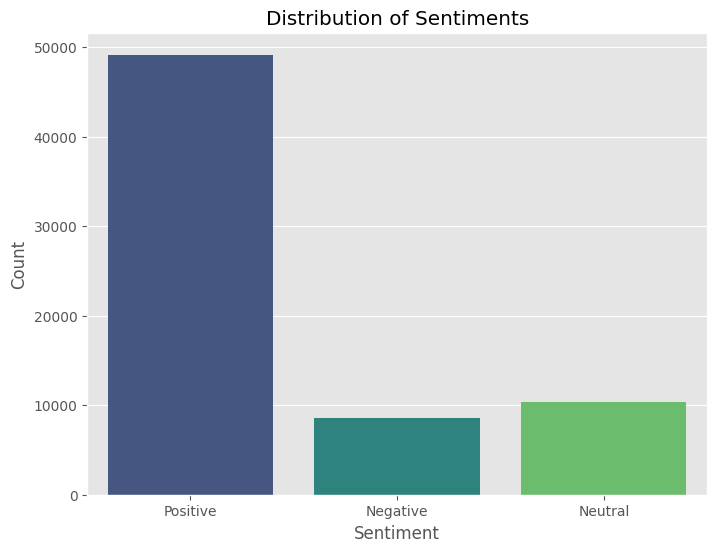

In [40]:
# Visualization of Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [46]:
# Select the mobile model name
selected_model = 'Iphone 11'

# Filter reviews mentioning the selected mobile model name
model_reviews = reviews[reviews['body'].str.contains(selected_model, case=False)]

# Clean text of reviews mentioning the model
model_reviews['clean_text'] = model_reviews['body'].apply(clean_text)

# Perform sentiment analysis
model_reviews['sentiment'] = model_reviews['clean_text'].apply(analyze_sentiment)

# Calculate the percentage of each sentiment
sentiment_percentage = model_reviews['sentiment'].value_counts(normalize=True) * 100

# Display the percentage of each sentiment
print("Sentiment Analysis Percentage for Reviews mentioning", selected_model, ":")
print(sentiment_percentage)


Sentiment Analysis Percentage for Reviews mentioning Iphone 11 :
sentiment
Positive    90.322581
Negative     6.451613
Neutral      3.225806
Name: proportion, dtype: float64


C:\Users\vibin\AppData\Local\Temp\ipykernel_15488\1792861820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_reviews['clean_text'] = model_reviews['body'].apply(clean_text)
C:\Users\vibin\AppData\Local\Temp\ipykernel_15488\1792861820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_reviews['sentiment'] = model_reviews['clean_text'].apply(analyze_sentiment)


In this project, we utilized natural language processing (NLP) techniques to analyze and classify sentiments from customer reviews. By employing TextBlob for sentiment analysis and TfidfVectorizer for text vectorization, we transformed textual data into a format suitable for machine learning models. We then trained a Linear Support Vector Classifier (LinearSVC) model to predict sentiment labels based on the review texts.

Through visualization, we gained insights into the distribution of reviews across different brands and the distribution of sentiments in the dataset. This provided valuable information for understanding customer sentiments towards various brands and products.

Overall, this project demonstrates the application of NLP in sentiment analysis, showcasing how it can be used to extract meaningful insights from textual data, which can further aid businesses in understanding customer feedback and making data-driven decisions.